In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split

CSV_FILE = 'extract_coordinates.csv'
data = pd.read_csv(CSV_FILE)

print(data.head())

X = data.drop(columns=['Label']).values # 왼쪽 손목 발목 XY
y = data['Label'].values  # sit=0, stand=1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

   left_shoulder_X  left_shoulder_Y  left_wrist_X  left_wrist_Y  left_knee_X  \
0         0.284777         0.549288      0.463987      0.628845     0.539132   
1         0.563711         0.547518      0.746427      0.561528     0.483818   
2         0.678762         0.525664      0.721515      0.746737     0.775539   
3         0.782518         0.464285      0.707022      0.575222     0.448376   
4         0.287310         0.402283      0.453064      0.462743     0.411522   

   left_knee_Y  Label  
0     0.513473      0  
1     0.713776      0  
2     0.781426      0  
3     0.522828      0  
4     0.548255      0  
(574, 6) (574,)
(246, 6) (246,)


In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', 'precision']
)

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_72 (Dense)                     │ (None, 512)                 │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_48 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_73 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_49 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_74 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_50 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_75 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_51 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_76 (Dense)                     │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_77 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 157,169 (613.94 KB)

 Trainable params: 155,441 (607.19 KB)

 Non-trainable params: 1,728 (6.75 KB)

In [47]:
history = model.fit(X_train, y_train, epochs=200, batch_size=32,
                    validation_split=0.2)

Epoch 1/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5077 - loss: 0.9841 - precision: 0.6256 - val_accuracy: 0.4435 - val_loss: 0.7082 - val_precision: 0.4435
Epoch 2/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5654 - loss: 0.8789 - precision: 0.7721 - val_accuracy: 0.4435 - val_loss: 0.7236 - val_precision: 0.4435
Epoch 3/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5902 - loss: 0.7563 - precision: 0.6648 - val_accuracy: 0.4435 - val_loss: 0.7465 - val_precision: 0.4435
Epoch 4/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6266 - loss: 0.7178 - precision: 0.6845 - val_accuracy: 0.4435 - val_loss: 0.8132 - val_precision: 0.4435
Epoch 5/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6576 - loss: 0.6804 - precision: 0.7064 - val_accuracy: 0.4435 - val_loss: 0.8933 - val_precision: 0.4435
Epoch 6/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6122 - loss: 0.7034 - precision: 0.6852 - val_accuracy: 0.4435 - val_loss: 0.93

In [48]:
test_loss, test_accuracy, test_presicion = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7802 - loss: 0.5400 - precision: 0.7208 
Test Accuracy: 80.49%


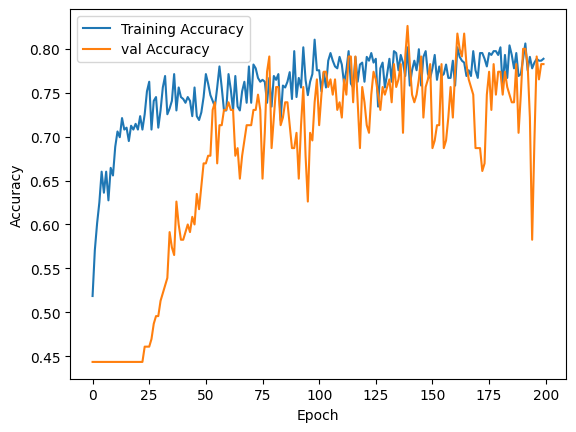

In [49]:
import matplotlib.pyplot as plt

# 정확도 시각화
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()